# Visualización de datos con Matplotlib



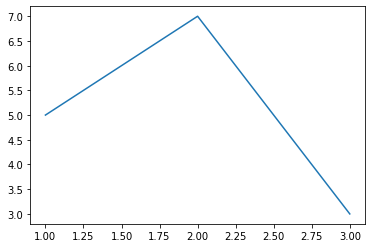

In [2]:
import matplotlib.pyplot as plt # por lo general se nombra plt

plt.plot([1, 2, 3], [5, 7, 3]) # grafica x e y

plt.show() # muestra todo lo que eventualmente hicimos

## Leyendas, titulos y etiquetas

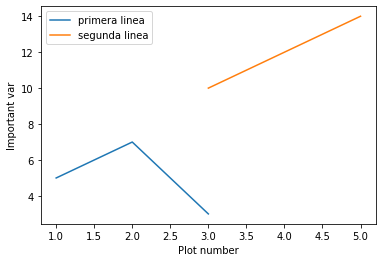

In [6]:
import matplotlib.pyplot as plt # por lo general se nombra plt

x = [1, 2, 3]
y = [5, 7, 3]

x2 = [3, 4, 5]
y2 = [ 10, 12, 14]

plt.plot(x, y, label = 'primera linea') 
plt.plot(x2, y2,  label = 'segunda linea')

#editando titulo laterales
plt.xlabel('Plot number')
plt.ylabel('Important var')

#finalmente el metodo .legend() invoca los elementos que se hayan definido previamente
plt.legend()

plt.show() # muestra todo lo que eventualmente hicimos

## Grafico de barras

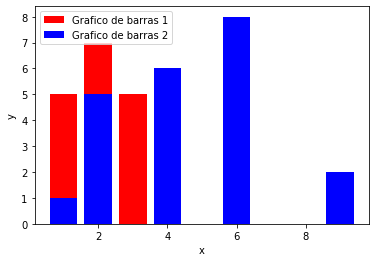

In [12]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 3, 4, 1]
y = [5, 7, 3, 5, 3, 3]

x2 = [4, 6, 9, 2, 6, 1]
y2 = [6, 8, 2, 5, 7, 1]

plt.bar(x, y, label = 'Grafico de barras 1', color = 'r')

plt.bar(x2, y2, label = 'Grafico de barras 2', color = 'b')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show() # muestra todo lo que eventualmente hicimos

## Histogramas

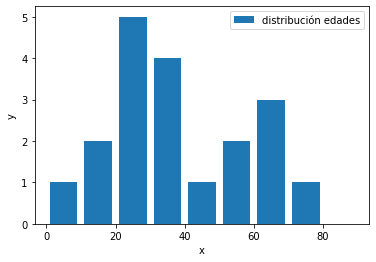

In [19]:
import matplotlib.pyplot as plt

edades = [22, 35, 60, 23, 45, 67, 12, 5, 32, 70, 10, 30, 26, 28, 26, 50, 34, 56, 68]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.hist(edades, bins, histtype = 'bar', rwidth = 0.8, label = 'distribución edades')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show() # muestra todo lo que eventualmente hicimos

## Grafico de dispersión

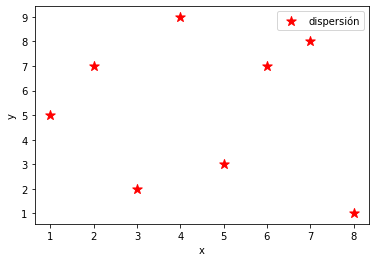

In [25]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [5, 7, 2, 9, 3, 7, 8, 1]
plt.scatter(x, y, label = 'dispersión', color = 'r', marker = '*', s = 100) # s de size

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show() # muestra todo lo que eventualmente hicimos

### Stack plots

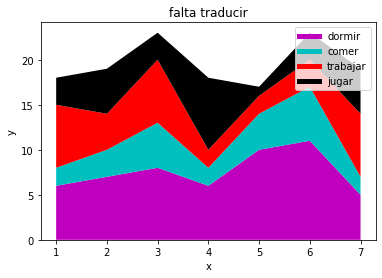

In [32]:
import matplotlib.pyplot as plt

dias = [1, 2, 3, 4, 5, 6, 7]

dormir = [6, 7, 8, 6, 10, 11, 5]
comer = [2, 3, 5, 2, 4, 6, 2]
trabajar = [7, 4, 7, 2, 2, 3, 7]
jugar = [3, 5, 3, 8, 1, 3, 5]

# estas lineas son para identificar que es que
plt.plot([], [], color = 'm', label = 'dormir', linewidth = 5)
plt.plot([], [], color = 'c', label = 'comer', linewidth = 5)
plt.plot([], [], color = 'r', label = 'trabajar', linewidth = 5)
plt.plot([], [], color = 'k', label = 'jugar', linewidth = 5)

plt.stackplot(dias, dormir,comer,trabajar,jugar, colors = ['m', 'c', 'r', 'k'])

plt.title('falta traducir')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show() # muestra todo lo que eventualmente hicimos

## Cargar datos al código

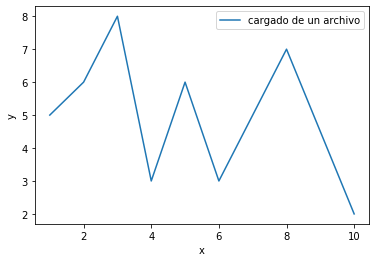

In [3]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('ejemplo_carga_datos.txt', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x, y, label = 'cargado de un archivo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show() 
        

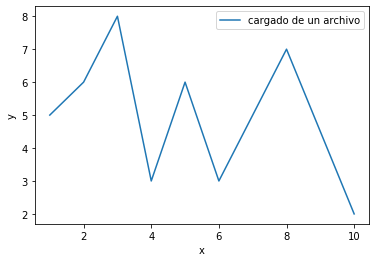

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt('ejemplo_carga_datos.txt', delimiter = ',', unpack = True)

plt.plot(x, y, label = 'cargado de un archivo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show() 

## Cargando datos de Internet


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data() :

    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split('\n')
    
    for line in split_source : 
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'Volume' not in line:
                stock_data.append(line)
    
    date, openp, highp, lowp, closep, adustedp, volume  = np.loadtxt(stock_data, 
                                                                     delimiter = ',', 
                                                                     unpack = True ,
                                                                    converters={0: bytespdate2num('%Y-%m-%d')})
    plt.plot_date(date, closep, '-')
    plt.plot(x, y, label = 'cargado de un archivo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show() 
    
graph_data()

/home/nasa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  import sys


ValueError: view limit minimum -36825.75 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units